In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Mobile phone price.csv')

In [6]:
df.isna().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [7]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [8]:
df['Brand'].value_counts()

Brand
Samsung       79
Xiaomi        67
Oppo          56
Realme        43
Vivo          35
Apple         30
Nokia         28
Motorola      23
OnePlus       15
Huawei        12
Google         7
Asus           4
LG             3
Blackberry     3
Sony           1
CAT            1
Name: count, dtype: int64

<Axes: xlabel='Brand'>

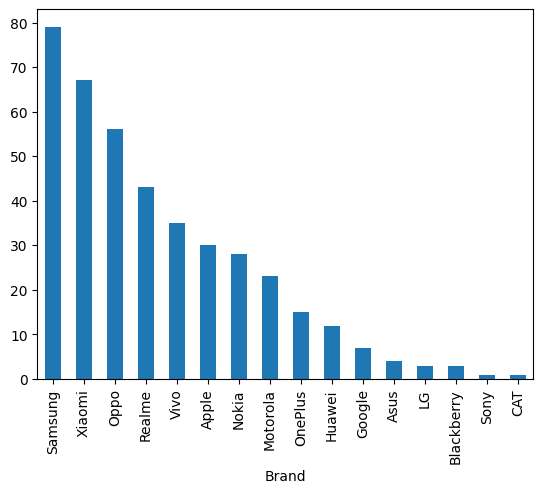

In [9]:
df['Brand'].value_counts().plot(kind='bar')

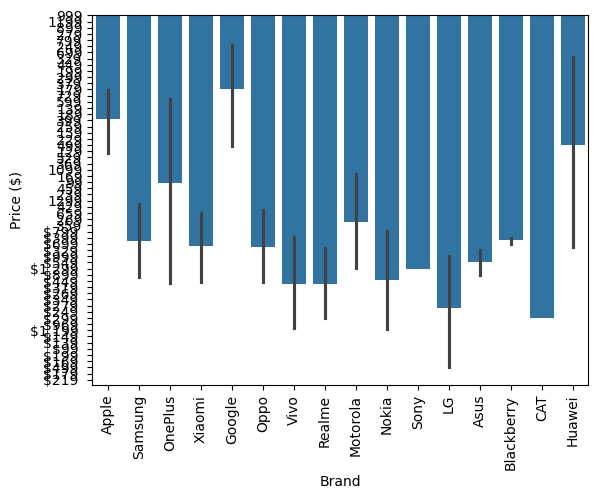

In [10]:
sns.barplot(x=df['Brand'],y=df['Price ($)'])
plt.xticks(rotation='vertical')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
df['Brand'] = lab.fit_transform(df['Brand'])

In [12]:
df['RAM'] = df['RAM '].str.replace('GB','')
df['RAM'] = df['RAM'].astype('int32')

In [13]:
df.drop(columns=['RAM '],inplace=True)

In [14]:
df['Storage'] = df['Storage '].str.replace('GB','')
df['Storage'] = df['Storage'].astype('int32')

In [15]:
df.drop(columns=['Storage '],inplace=True)

In [16]:
df.columns

Index(['Brand', 'Model', 'Screen Size (inches)', 'Camera (MP)',
       'Battery Capacity (mAh)', 'Price ($)', 'RAM', 'Storage'],
      dtype='object')

In [17]:
df['Price ($)'] = df['Price ($)'].str.replace('$','')
df['Price ($)'] = df['Price ($)'].str.replace(',','')
df['Price ($)'] = df['Price ($)'].astype('float32')

In [18]:
df['5G'] = df['Model'].apply(lambda x:1 if '5G' in x else 0)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   407 non-null    int32  
 1   Model                   407 non-null    object 
 2   Screen Size (inches)    407 non-null    object 
 3   Camera (MP)             407 non-null    object 
 4   Battery Capacity (mAh)  407 non-null    int64  
 5   Price ($)               407 non-null    float32
 6   RAM                     407 non-null    int32  
 7   Storage                 407 non-null    int32  
 8   5G                      407 non-null    int64  
dtypes: float32(1), int32(3), int64(2), object(3)
memory usage: 22.4+ KB


In [20]:
df['Model']

0          iPhone 13 Pro
1       Galaxy S21 Ultra
2                  9 Pro
3      Redmi Note 10 Pro
4                Pixel 6
             ...        
402     Galaxy Note20 5G
403        Mi 10 Lite 5G
404    iPhone 12 Pro Max
405                Reno3
406      Galaxy S10 Lite
Name: Model, Length: 407, dtype: object

In [21]:
df['Camera (MP)']

0            12 + 12 + 12
1      108 + 10 + 10 + 12
2         48 + 50 + 8 + 2
3          64 + 8 + 5 + 2
4               50 + 12.2
              ...        
402              12+64+12
403              48+8+2+2
404              12+12+12
405             48+13+8+2
406               48+12+5
Name: Camera (MP), Length: 407, dtype: object

In [22]:
df = df[(df['Screen Size (inches)'] != '6.8 + 3.9') & (~df['Screen Size (inches)'].str.contains('7.6 \\(unfolded\\)', na=False))]


In [23]:
df['Screen Size (inches)'] = df['Screen Size (inches)'].astype('float32')

In [24]:
camera_data = df['Camera (MP)'].str.split('+', expand=True).fillna('0')


df['Primary camera'] = camera_data[0]
df['Front camera'] = camera_data[1]
df['Secondary camera'] = camera_data[2]
df['Macro camera'] = camera_data[3]

df['Primary camera']

0       12 
1      108 
2       48 
3       64 
4       50 
       ... 
402      12
403      48
404      12
405      48
406      48
Name: Primary camera, Length: 405, dtype: object

In [25]:
df.columns

Index(['Brand', 'Model', 'Screen Size (inches)', 'Camera (MP)',
       'Battery Capacity (mAh)', 'Price ($)', 'RAM', 'Storage', '5G',
       'Primary camera', 'Front camera', 'Secondary camera', 'Macro camera'],
      dtype='object')

In [26]:
df['Primary camera'] = df['Primary camera'].str.replace('MP','')
df['Primary camera'] = df['Primary camera'].astype('float32')

In [27]:
df['Front camera'] = df['Front camera'].str.replace('MP','')
df['Front camera'] = df['Front camera'].astype('float32')

In [28]:
df['Secondary camera'] = df['Secondary camera'].str.replace('MP','')
df['Secondary camera'] = df['Secondary camera'].astype('float32')

In [29]:
df['Macro camera'] = df['Macro camera'].str.replace('MP','')
df['Macro camera'] = df['Macro camera'].str.replace('3D','')

df = df[df['Macro camera'] != '']
df = df[df['Macro camera'] != 'ToF']
df['Macro camera'] = df['Macro camera'].astype('float32')

In [30]:
df.drop(columns=['Camera (MP)'],inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 406
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   398 non-null    int32  
 1   Model                   398 non-null    object 
 2   Screen Size (inches)    398 non-null    float32
 3   Battery Capacity (mAh)  398 non-null    int64  
 4   Price ($)               398 non-null    float32
 5   RAM                     398 non-null    int32  
 6   Storage                 398 non-null    int32  
 7   5G                      398 non-null    int64  
 8   Primary camera          398 non-null    float32
 9   Front camera            398 non-null    float32
 10  Secondary camera        398 non-null    float32
 11  Macro camera            398 non-null    float32
dtypes: float32(6), int32(3), int64(2), object(1)
memory usage: 26.4+ KB


In [32]:
df['Model'].value_counts()

Model
Poco X3 Pro           6
A54                   5
C21Y                  5
iPhone XR             5
Y33s                  5
                     ..
A53s 5G               1
Mi 11 Lite NE         1
Moto G Stylus 2021    1
A54s 5G               1
Reno3                 1
Name: count, Length: 232, dtype: int64

In [33]:
df.drop(columns=['Model'],inplace=True)

In [34]:
df.corr()['Price ($)']

Brand                    -0.378364
Screen Size (inches)     -0.034243
Battery Capacity (mAh)   -0.420071
Price ($)                 1.000000
RAM                       0.617548
Storage                   0.667645
5G                        0.153073
Primary camera            0.119753
Front camera              0.623662
Secondary camera          0.616514
Macro camera              0.193432
Name: Price ($), dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   398 non-null    int32  
 1   Screen Size (inches)    398 non-null    float32
 2   Battery Capacity (mAh)  398 non-null    int64  
 3   Price ($)               398 non-null    float32
 4   RAM                     398 non-null    int32  
 5   Storage                 398 non-null    int32  
 6   5G                      398 non-null    int64  
 7   Primary camera          398 non-null    float32
 8   Front camera            398 non-null    float32
 9   Secondary camera        398 non-null    float32
 10  Macro camera            398 non-null    float32
dtypes: float32(6), int32(3), int64(2)
memory usage: 23.3 KB


In [36]:
df['Price'] = df['Price ($)']*83

In [37]:
df.drop(columns=['Price ($)'],inplace=True)

In [38]:
df.corr()['Price']

Brand                    -0.378364
Screen Size (inches)     -0.034243
Battery Capacity (mAh)   -0.420071
RAM                       0.617548
Storage                   0.667645
5G                        0.153073
Primary camera            0.119753
Front camera              0.623662
Secondary camera          0.616514
Macro camera              0.193432
Price                     1.000000
Name: Price, dtype: float64

In [39]:
df.drop(columns=['Screen Size (inches)'],inplace=True)

In [40]:
X = df.drop(columns = ['Price'])
Y = df['Price']

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [93]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [94]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'DecisionTree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(n_neighbors=3),
    'RandomForest' : RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
}

trained_model_list = []
model_list = []
r2_list = []

best_model = None
best_r2 = float('-inf')

def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2_square = r2_score(y_test, y_pred)
    return mae, rmse, r2_square

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae, rmse, r2_square = evaluate_model(y_test, y_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model Training Performance')
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 score", r2_square * 100)

    r2_list.append(r2_square)

    if r2_square > best_r2:
        best_r2 = r2_square
        best_model = model

    print('=' * 35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 11521.590466362422
MAE: 7648.865556891123
R2 score 78.11428711574014




c:\Users\sujit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\sujit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\sujit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\sujit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

Lasso
Model Training Performance
RMSE: 11521.536833587754
MAE: 7648.567609963805
R2 score 78.11449087038305


Ridge
Model Training Performance
RMSE: 11526.514293090708
MAE: 7645.707463129684
R2 score 78.09557711477937


ElasticNet
Model Training Performance
RMSE: 12823.649553233347
MAE: 8207.52563972239
R2 score 72.88815261733367


DecisionTree
Model Training Performance
RMSE: 10789.964012582437
MAE: 5516.3875
R2 score 80.80554340908105


KNN
Model Training Performance
RMSE: 11979.432
MAE: 6658.4443
R2 score 76.34035348892212


RandomForest
Model Training Performance
RMSE: 7789.710892676003
MAE: 4834.935267857142
R2 score 89.99588885257877




c:\Users\sujit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [95]:
print(best_model)
print('with accuracy {}'.format(best_r2*100) )

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5,
                      random_state=3)
with accuracy 89.99588885257877


In [96]:
import joblib

joblib.dump(best_model, 'best_model.pkl')

print("Best model saved to 'best_model.pkl'")

Best model saved to 'best_model.pkl'


In [97]:
dataset = df.copy()

In [98]:
dataset['Brand']=lab.inverse_transform(dataset['Brand'])

In [99]:
import joblib

joblib.dump(dataset, 'dataset.pkl')

print("Best model saved to 'best_model.pkl'")

Best model saved to 'best_model.pkl'
